# `dmnautilus`

The only adaptive binning tool currently availalbe in CIAO is the `dmnautilus` tool.

It works by dividing the image into 4 quadrants.  If the SNR in all 4 quadrants is **above** the SNR limit,
then each of those quadrants is subdivided into 4, and so on.  When the SNR in all 4 quadrants is below the SNR limit, the pixels are grouped together.

The SNR logic is counter intuative to what users are expecting.

There is an updated version of `dmnautilus` [on github](https://github.com/kglotfelty/dmnautilus) which supports treating the SNR as a lower-limit via the `method` parameter.

- `0` : original logic, no quadrants above the threshold
- `1` : if any one quadrant is above the threshold, then split and continue
- `2` : if any two side-by-side quandrants are above threshold (not diagonal), then split
- `3` : if any three quandrants are above threshold, split.
- `4` : all four quandrants must be above threshold to split.

While `4` seems like the preferred option, there are issues when the FOV of the data does not full cover the image.  Well see this below.


# **Based on what I'm seeing below.  I really want to do this on the counts image and let it compute errors internally**

In [1]:
punlearn dmnautilus

In [2]:
# Link to input files

/bin/rm -rf dmnautilus
mkdir dmnautilus
cd dmnautilus
ln -s ../abell665.flux.asm ./
ln -s ../abell665_fill.asm ./
ln -s ../abell665.expmap.asm ./
ln -s ../acisf13201_repro_fov1.fits ./
ln -s ../sunset-in-atlantis.sao .

Since I'm feeding in a flux image, I need to compute the errors 

In [3]:
dmimgcalc abell665_fill.asm,abell665.expmap.asm none - op="imgout=((sqrt(img1+0.75)/img2))" | \
  dmcopy infile="-[sky=region(acisf13201_repro_fov1.fits[ccd_id=0:3])][opt full]" \
  outfile=abell665.flux_err.asm clob+

Okay, now run `dmnautilus` with `snr=6`. Basically an upper limit of 36 counts per-group.


In [4]:
dmnautilus infile=abell665.flux.asm outfile=nautilus.0.img snr=6 method=0 \
  outmask=nautilus.0.map inerr=abell665.flux_err.asm clob+ mode=h

In [5]:
# dmimggrad is not included in CIAO.  I am only using it to create
# a mask file to overlay the map boundaries in ds9.

dmimggrad nautilus.0.map nautilus.0.grad sobel mag clob+

In [6]:
# map2reg nautilus.0.map nautilus.0.reg

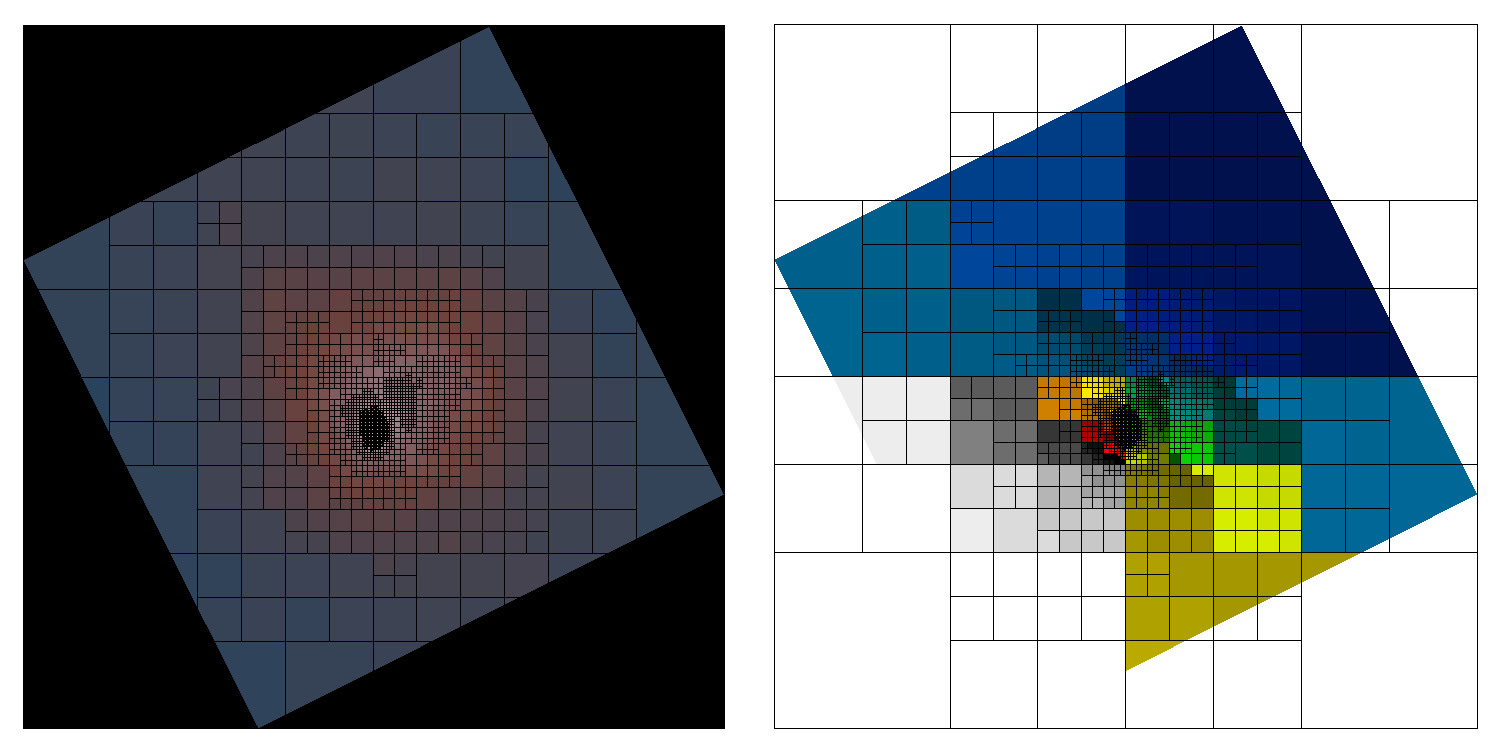

In [7]:
ds9 -geometry 1500x800 nautilus.0.img -scale log -scale limits 0 2e-6 -block to 2 \
    -cmap load sunset-in-atlantis.sao \
    -nan black \
    -mask color black -mask nautilus.0.grad -nomask \
    nautilus.0.map -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -regions select all -regions color black -regions select none  \
    -saveimage png nautilus.0.png -exit

display < nautilus.0.png

## Now try upgraded versions:


In [8]:
# method=1 
dmnautilus infile=abell665.flux.asm outfile=nautilus.1.img snr=6 \
  method=1 outmask=nautilus.1.map inerr=abell665.flux_err.asm clob+ mode=h

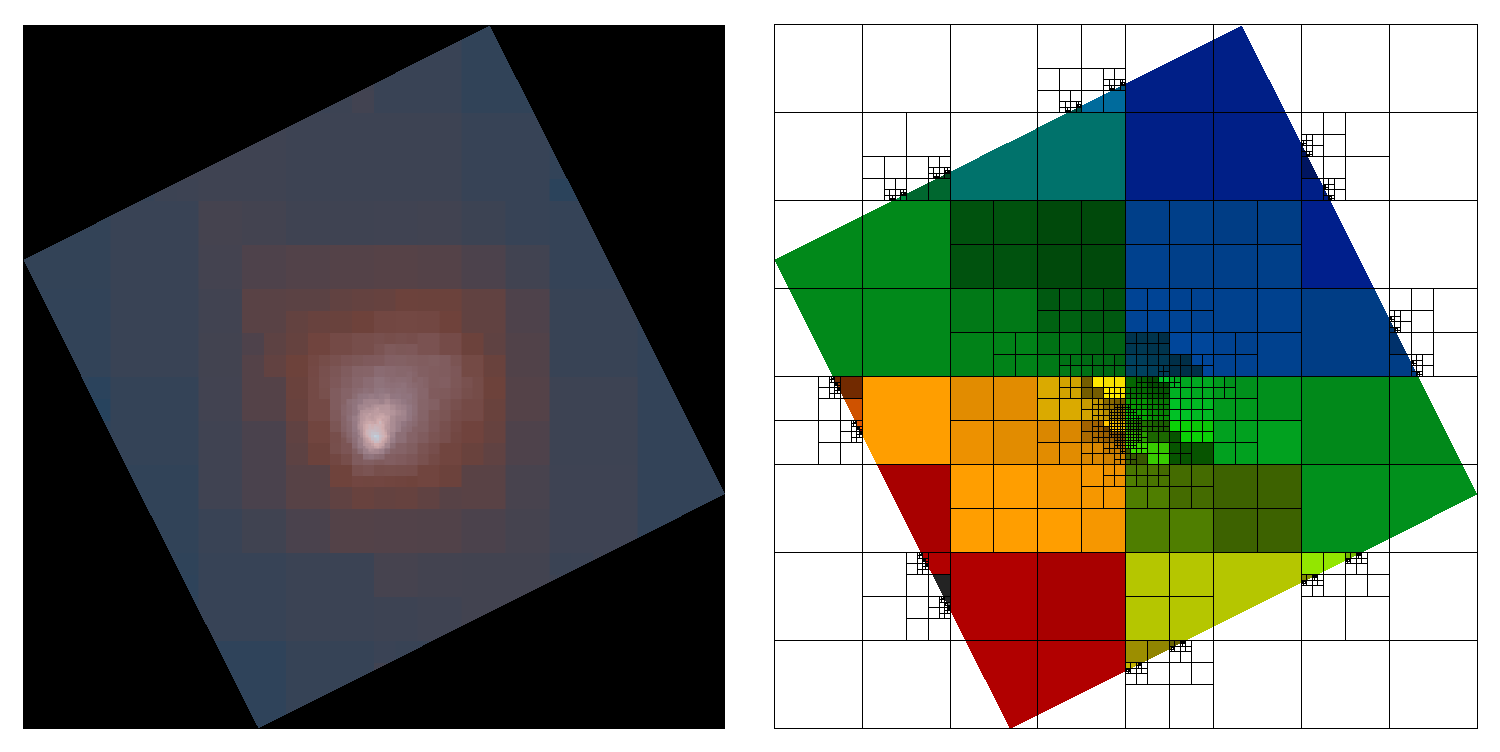

In [9]:
ds9 -geometry 1500x800 nautilus.1.img -scale log -scale limits 0 2e-6 -block to 2 \
    -cmap load sunset-in-atlantis.sao \
    -nan black \
    nautilus.1.map -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -regions select all -regions color black -regions select none  \
    -saveimage png nautilus.1.png -exit

display < nautilus.1.png

In [10]:
# method=2
dmnautilus infile=abell665.flux.asm outfile=nautilus.2.img snr=6 method=2 \
  outmask=nautilus.2.map inerr=abell665.flux_err.asm clob+ mode=h

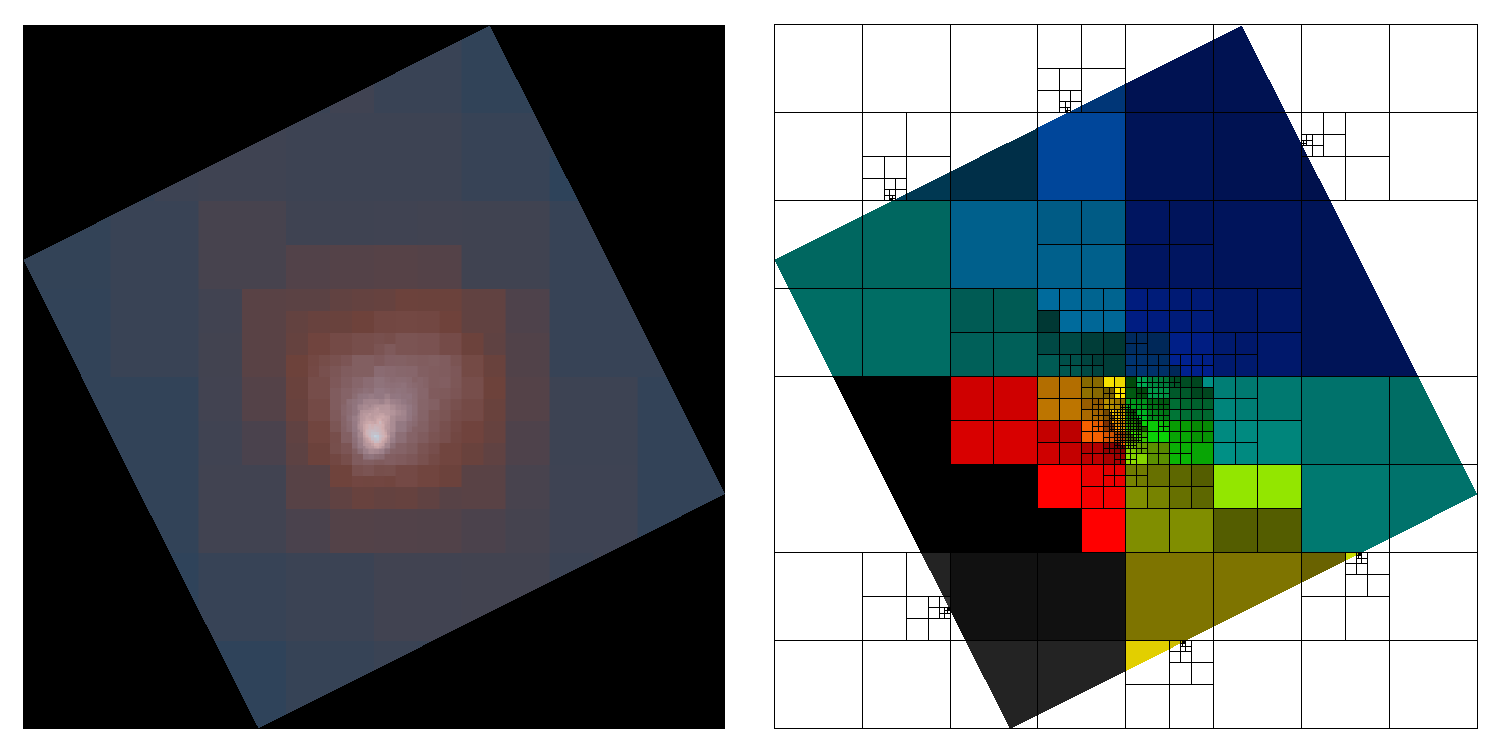

In [11]:
ds9 -geometry 1500x800 nautilus.2.img -scale log -scale limits 0 2e-6 -block to 2 \
    -cmap load sunset-in-atlantis.sao \
    -nan black \
    nautilus.2.map -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -regions select all -regions color black -regions select none  \
    -saveimage png nautilus.2.png -exit

display < nautilus.2.png

In [12]:
# method=3
dmnautilus infile=abell665.flux.asm outfile=nautilus.3.img snr=6 method=3 \
  outmask=nautilus.3.map inerr=abell665.flux_err.asm clob+ mode=h

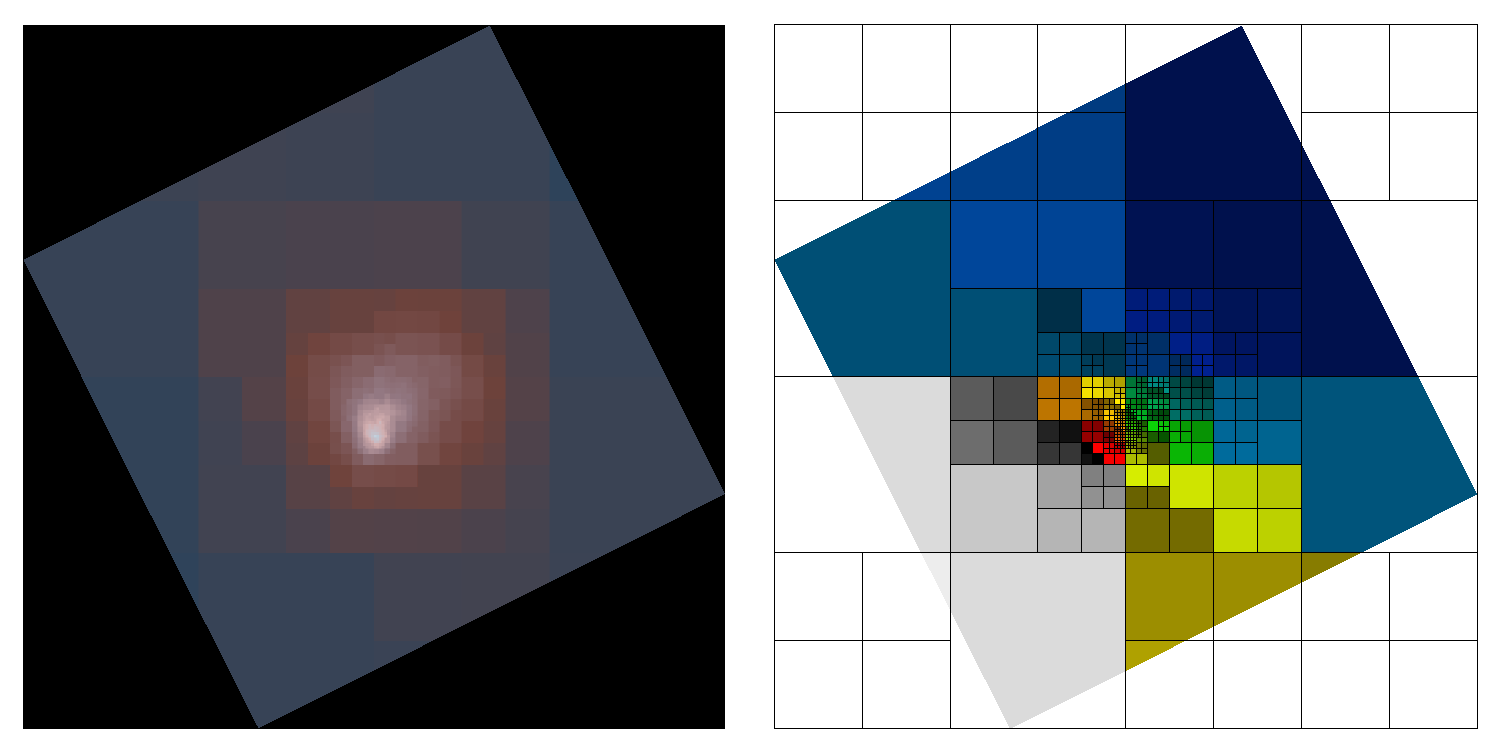

In [13]:
ds9 -geometry 1500x800 nautilus.3.img -scale log -scale limits 0 2e-6 -block to 2 \
    -cmap load sunset-in-atlantis.sao \
    -nan black \
    nautilus.3.map -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -regions select all -regions color black -regions select none  \
    -saveimage png nautilus.3.png -exit

display < nautilus.3.png

Err, something looks wrong.  But let's keep going for now.

In [14]:
# method=4
dmnautilus infile=abell665.flux.asm outfile=nautilus.4.img snr=6 method=4 \
  outmask=nautilus.4.map inerr=abell665.flux_err.asm clob+ mode=h

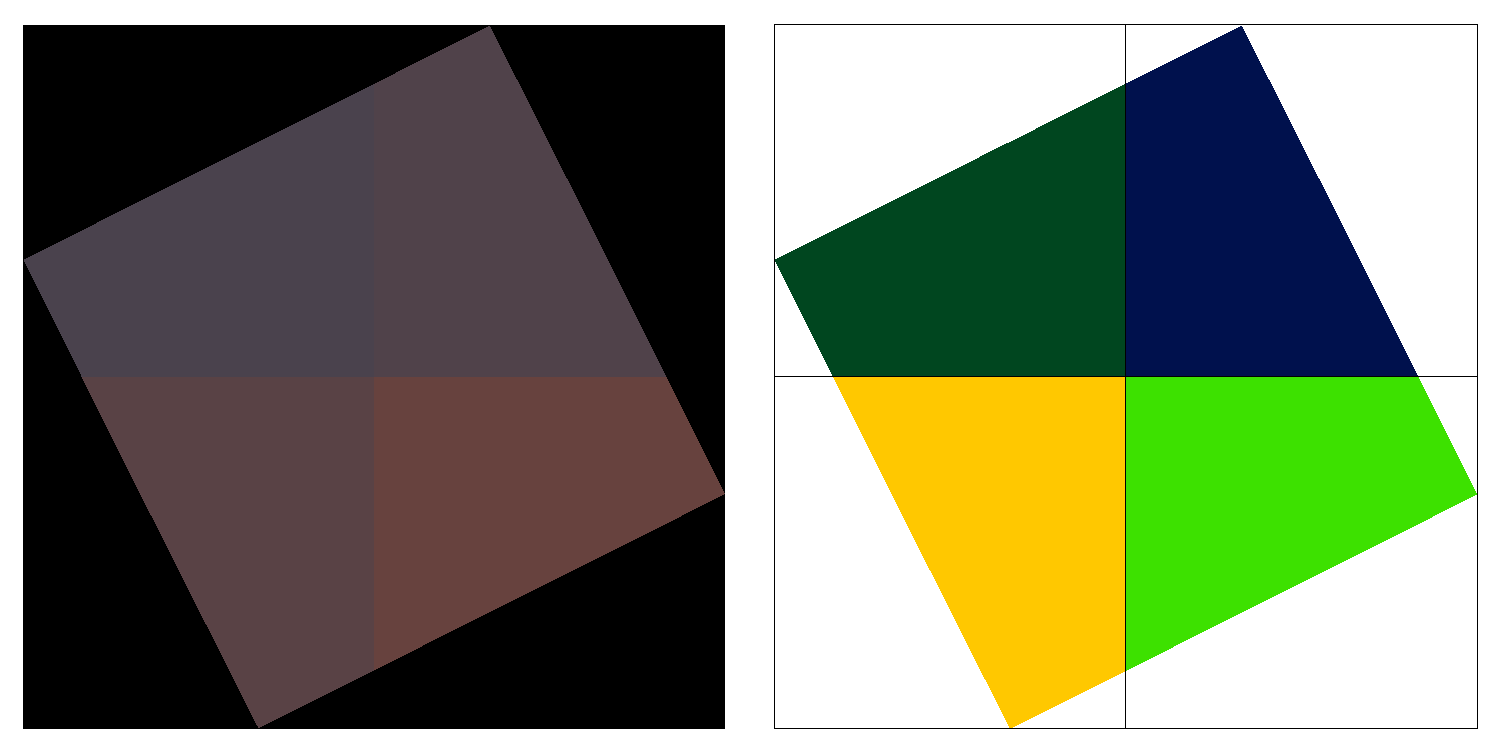

In [15]:
ds9 -geometry 1500x800 nautilus.4.img -scale log -scale limits 0 2e-6 -block to 2 \
    -cmap load sunset-in-atlantis.sao \
    -nan black \
    nautilus.4.map -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -regions select all -regions color black -regions select none  \
    -saveimage png nautilus.4.png -exit

display < nautilus.4.png

What?

So it turns out that the first division into 4 quadrants works :  all 4 quadrants have SNR >= 10.

But then we try to divide each of those into 4 smaller quadrants. The problem is that there are so many pixels in the corners that outside the FOV.  When we split into quadrants the fractionally exposed quandrants don't have enough SNR to exceed the threshold and so the splitting stops.

The tool knows that if all the pixels in a quadrant are outside the subspace then that quadrant does not have to be above SNR.  But if any pixel is inside the subspace, then that quadrant has to meet the `method` criteria.


Okay, so then what can we do?  

Well, this is an unfortunate case where the data are the problem. Since the problem is that there are "large" quadrants which are partially exposed, can we make those smaller?  

We can rotate the image to align the chip boundaries with the X,Y image axes.  This gives us a better chance of having more fully empty quandrants around the edge, and the partially exposed quandrants will hopefully be more
pixels exposed.



Let's give it a try

In [16]:
rot=`dmkeypar abell665.flux.asm ROLL_PNT echo+`

# Hacky way to get axis lengths!
xcen=`dmimgproject abell665.flux.asm - x | dmlist - counts | sed 's, *$,/2.0,' | bc `
ycen=`dmimgproject abell665.flux.asm - y | dmlist - counts | sed 's, *$,/2.0,' | bc `

dmregrid2 abell665.flux.asm rot.img theta=$rot mode=h clob+ coord=logical rotx=$xcen roty=$ycen 
dmregrid2 abell665.flux_err.asm rot.err theta=$rot mode=h clob+ coord=logical rotx=$xcen roty=$ycen 

I also need to generate something to give me the FOV in the rotated coordinate system.

In [17]:
dmimghull rot.img rot.hull clob+

In [18]:
ds9 rot.img rot.err


In [19]:
dmnautilus infile="rot.img[(x,y)=region(rot.hull)][opt full]" \
  outfile=nautilus_rot.4.img snr=6 inerr=rot.err"[(x,y)=region(rot.hull)][opt full]" \
  method=4 outmask=nautilus_rot.4.map clob+ mod=h


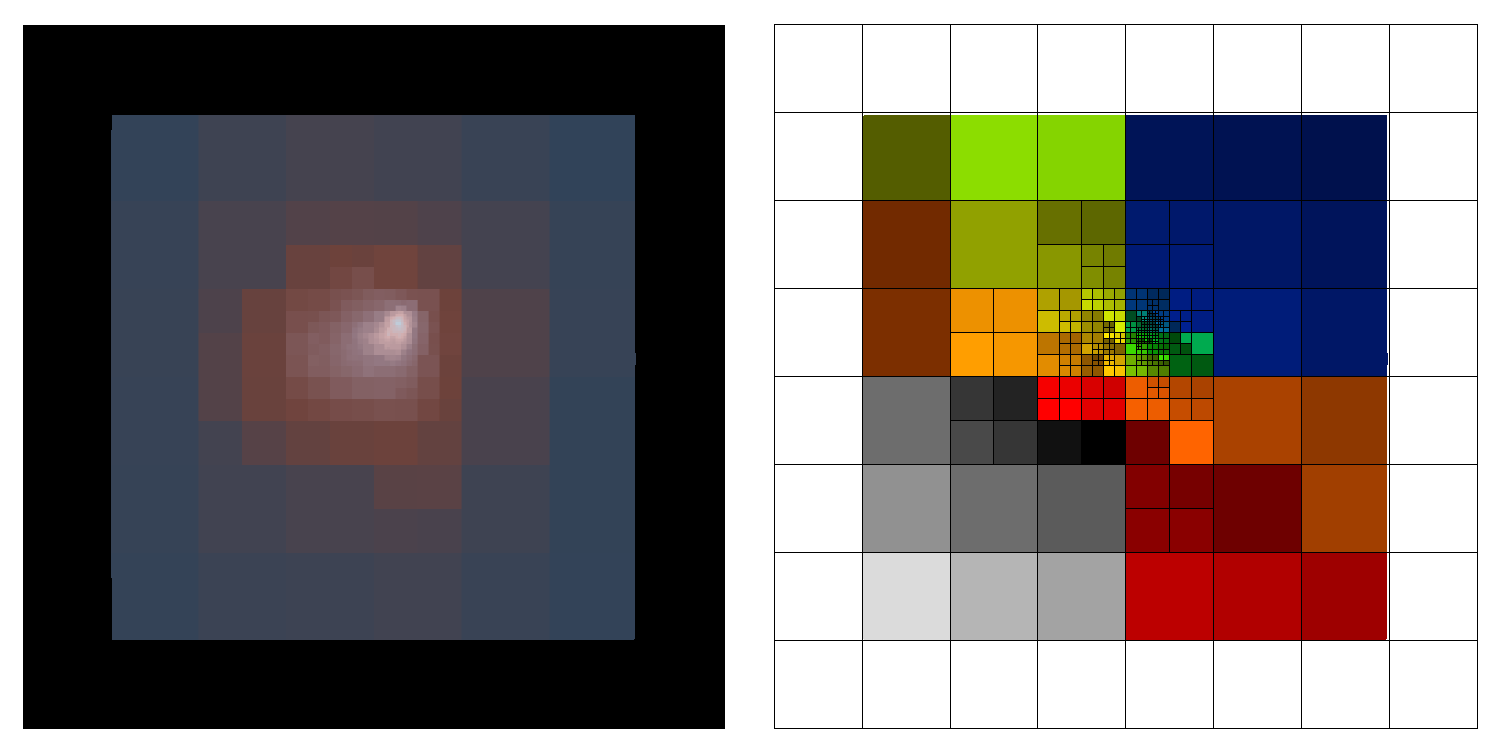

In [20]:
ds9 -geometry 1500x800 nautilus_rot.4.img -scale log -scale limits 0 2e-6 -block to 2 \
    -cmap load sunset-in-atlantis.sao \
    -nan black \
    nautilus_rot.4.map -scale linear -scale mode minmax -zoom to 0.5 -block to 1 \
    -cmap load $ASCDS_INSTALL/contrib/data/16_ramps.lut \
    -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
    -regions select all -regions color black -regions select none  \
    -saveimage png nautilus_rot.4.png -exit

display < nautilus_rot.4.png

Left to the user to rotate back to N-up.